In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv("raceDetails.csv")

In [4]:
df

,race_date,race_city,race_no,race_type,race_sex_group,race_age_group,race_race_group,race_length,race_track_type,race_track_condition,best_rating
0,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,1.24.50
1,2024-01-01,Bursa,2,Maiden,Undefined,4 Years Old,Arabian,1400,Dirt,Good Going,1.33.63
2,2024-01-01,Bursa,3,Condition 3,Female,3 Years Old,English,1200,Dirt,Good Going,1.11.37
3,2024-01-01,Bursa,4,Condition 4,Undefined,4 Years Old and Up,Arabian,2000,Dirt,Good Going,2.18.40
4,2024-01-01,Bursa,5,Handicap 15,Undefined,4 Years Old and Up,English,1300,Dirt,Good Going,1.18.11
...,...,...,...,...,...,...,...,...,...,...,...
475,2024-01-31,Şanlıurfa,4,Handicap 15,Undefined,4 Years Old and Up,English,2100,Dirt,Good Going,2.13.86
476,2024-01-31,Şanlıurfa,5,Condition 2,Female,4 Years Old,Arabian,1400,Dirt,Good Going,1.35.56
477,2024-01-31,Şanlıurfa,6,Maiden,Undefined,3 Years Old,English,1300,Dirt,Good Going,1.19.29
478,2024-01-31,Şanlıurfa,7,Condition 3,Undefined,4 Years Old and Up,English,1300,Dirt,Good Going,1.19.29


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   race_date             480 non-null    object
 1   race_city             480 non-null    object
 2   race_no               480 non-null    int64 
 3   race_type             480 non-null    object
 4   race_sex_group        480 non-null    object
 5   race_age_group        480 non-null    object
 6   race_race_group       480 non-null    object
 7   race_length           480 non-null    int64 
 8   race_track_type       480 non-null    object
 9   race_track_condition  480 non-null    object
 10  best_rating           480 non-null    object
dtypes: int64(2), object(9)
memory usage: 41.4+ KB


In [6]:
df['best_rating_seconds'] = pd.to_datetime(df['best_rating'], format='%M.%S.%f').dt.minute * 60 + pd.to_datetime(df['best_rating'], format='%M.%S.%f').dt.second + pd.to_datetime(df['best_rating'], format='%M.%S.%f').dt.microsecond / 1e6

In [8]:
df["race_track_type"].unique()

array(['Dirt', 'Dirt (Polytrack)'], dtype=object)

In [9]:
df = pd.get_dummies(df, columns=['race_track_type','race_race_group','race_sex_group'],drop_first=True)

In [10]:
df["race_city"].unique()

array(['Bursa', 'Adana', 'Antalya', 'İstanbul', 'İzmir', 'Kocaeli',
       'Şanlıurfa'], dtype=object)

In [11]:
le=LabelEncoder()
le.fit(df["race_date"])
df["race_date"]=le.transform(df["race_date"])

In [12]:
le.fit(df["race_city"])
df["race_city"]=le.transform(df["race_city"])

In [13]:
le.fit(df["race_type"])
df["race_type"]=le.transform(df["race_type"])

In [14]:
le.fit(df["race_track_condition"])
df["race_track_condition"]=le.transform(df["race_track_condition"])

In [15]:
le.fit(df["race_age_group"])
df["race_age_group"]=le.transform(df["race_age_group"])

In [16]:
df=df.drop(columns=["race_no","best_rating"])

In [17]:
df

,race_date,race_city,race_type,race_age_group,race_length,race_track_condition,best_rating_seconds,race_track_type_Dirt (Polytrack),race_race_group_English,race_sex_group_Undefined
0,0,2,1,0,1400,0,84.50,0,1,1
1,0,2,16,1,1400,0,93.63,0,0,1
2,0,2,2,0,1200,0,71.37,0,1,0
3,0,2,3,2,2000,0,138.40,0,0,1
4,0,2,12,2,1300,0,78.11,0,1,1
...,...,...,...,...,...,...,...,...,...,...
475,30,6,12,2,2100,0,133.86,0,1,1
476,30,6,1,1,1400,0,95.56,0,0,0
477,30,6,16,0,1300,0,79.29,0,1,1
478,30,6,2,2,1300,0,79.29,0,1,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   race_date                         480 non-null    int32  
 1   race_city                         480 non-null    int32  
 2   race_type                         480 non-null    int32  
 3   race_age_group                    480 non-null    int32  
 4   race_length                       480 non-null    int64  
 5   race_track_condition              480 non-null    int32  
 6   best_rating_seconds               480 non-null    float64
 7   race_track_type_Dirt (Polytrack)  480 non-null    uint8  
 8   race_race_group_English           480 non-null    uint8  
 9   race_sex_group_Undefined          480 non-null    uint8  
dtypes: float64(1), int32(5), int64(1), uint8(3)
memory usage: 18.4 KB


In [19]:
x = df.drop(['best_rating_seconds'], axis=1)
y = df['best_rating_seconds']

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,train_size=0.70)

In [21]:
lr = LinearRegression()
model1 = lr.fit(x_train,y_train)
model1.score(x_test,y_test)

0.9943632754477446

In [22]:
rf = RandomForestRegressor(n_estimators=200)
model2 = rf.fit(x_train, y_train)
model2.score(x_test,y_test)

0.9940290609926044

In [24]:
print("Linear Regression Training Accuracy:", model1.score(x_train , y_train))
print("Linear Regression Testing Accuracy:", model1.score(x_test , y_test))

Linear Regression Training Accuracy: 0.9968879355449048
Linear Regression Testing Accuracy: 0.9943632754477446


In [25]:
print("Random Forest Training Accuracy:", model2.score(x_train , y_train))
print("Random Forest Testing Accuracy:", model2.score(x_test , y_test))

Random Forest Training Accuracy: 0.9997695043241018
Random Forest Testing Accuracy: 0.9940290609926044


In [34]:
sample=np.array(x.iloc[250])

In [35]:
model1.predict([sample])

C:\Users\MERAL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([80.60510069])

In [36]:
y.iloc[250]

80.38

In [37]:
model2.predict([sample])

C:\Users\MERAL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([80.37535])

C:\Users\MERAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


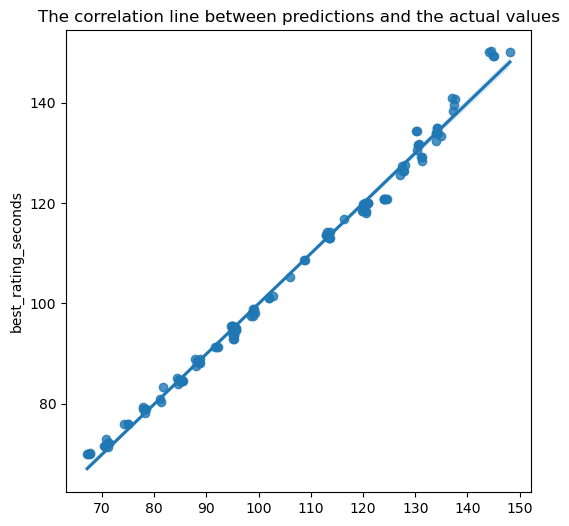

In [39]:
y_pred = model1.predict(x_test)
plt.figure(figsize=(6,6))
sns.regplot(y_pred, y_test)
plt.title("The correlation line between predictions and the actual values")
plt.show()